In [13]:
import numpy as np
import pandas as pd
import os
import itertools
import warnings
warnings.filterwarnings('ignore')
import io

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### Data Import

In [14]:
data = pd.read_csv(r'C:\Users\SNEHA\Downloads\xAPI-Edu-Data.csv')
data.head(20)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


In [15]:
data.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

### Data type

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

### Identity missing data

In [17]:
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

### Identify outliers

<AxesSubplot:>

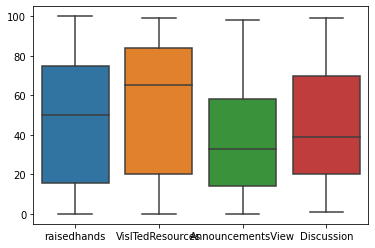

In [18]:
sns.boxplot(data=data)

In [19]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


#### Counts of all Qualitative variable

In [20]:
for column in ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation',
               'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']:
    print(data[column].value_counts())
    print('*****************')
    print('*****************')
    

M    305
F    175
Name: gender, dtype: int64
*****************
*****************
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
*****************
*****************
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
*****************
*****************
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
*****************
*****************
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: 

## Q1.

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

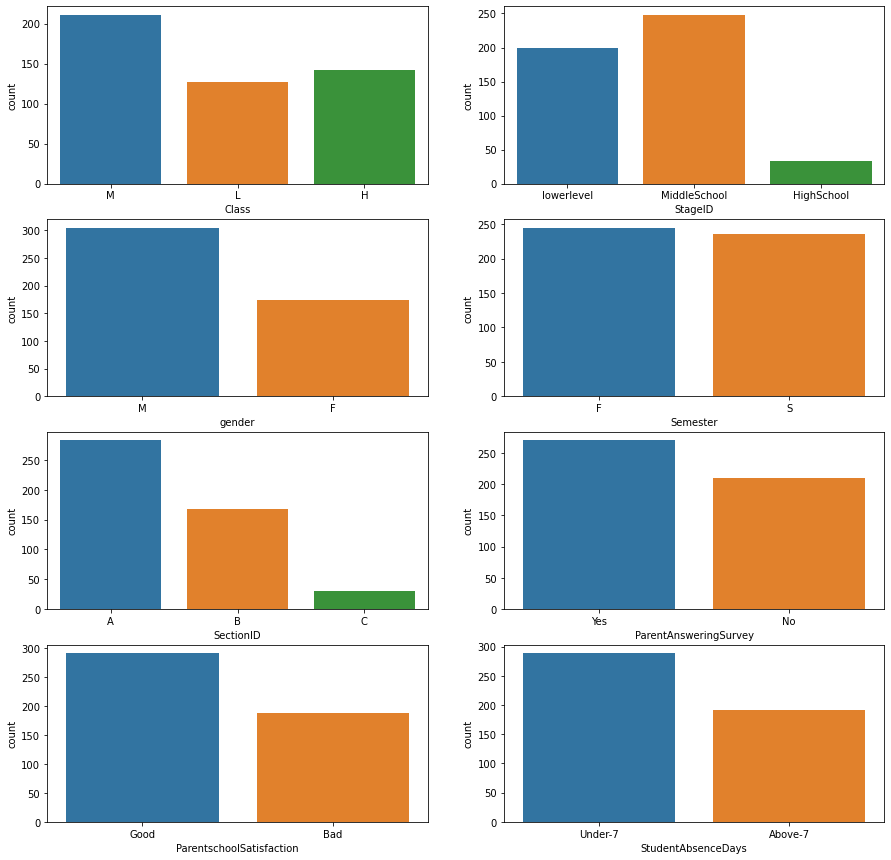

In [21]:
from matplotlib import pyplot as plt
f , axes = plt.subplots(4,2,figsize=(15,15))

sns.countplot(x='Class',data=data,ax=axes[0,0])
sns.countplot(x='StageID',data=data,ax=axes[0,1])
sns.countplot(x='gender',data=data,ax=axes[1,0])
sns.countplot(x='Semester',data=data,ax=axes[1,1])
sns.countplot(x='SectionID',data=data,ax=axes[2,0])
sns.countplot(x='ParentAnsweringSurvey',data=data,ax=axes[2,1])
sns.countplot(x='ParentschoolSatisfaction',data=data,ax=axes[3,0])
sns.countplot(x='StudentAbsenceDays',data=data,ax=axes[3,1])

* From the above plot it is noticed that there are higher number of boys as compared to girls studying in each class
* There are higher number of students in SectionID-A
* The count of highschool is least among all stageID's
* It is observed that around 50% of the parents do not answer the survey


In [22]:
pd.crosstab(data.Topic,data.Class,normalize='columns')

Class,H,L,M
Topic,,,
Arabic,0.133803,0.133858,0.109005
Biology,0.112676,0.031496,0.047393
Chemistry,0.070423,0.062992,0.028436
English,0.119718,0.078740,0.085308
French,0.140845,0.125984,0.137441
Geology,0.042254,0.000000,0.085308
History,0.028169,0.023622,0.056872
IT,0.105634,0.299213,0.199052
Math,0.042254,0.055118,0.037915


<AxesSubplot:xlabel='GradeID', ylabel='count'>

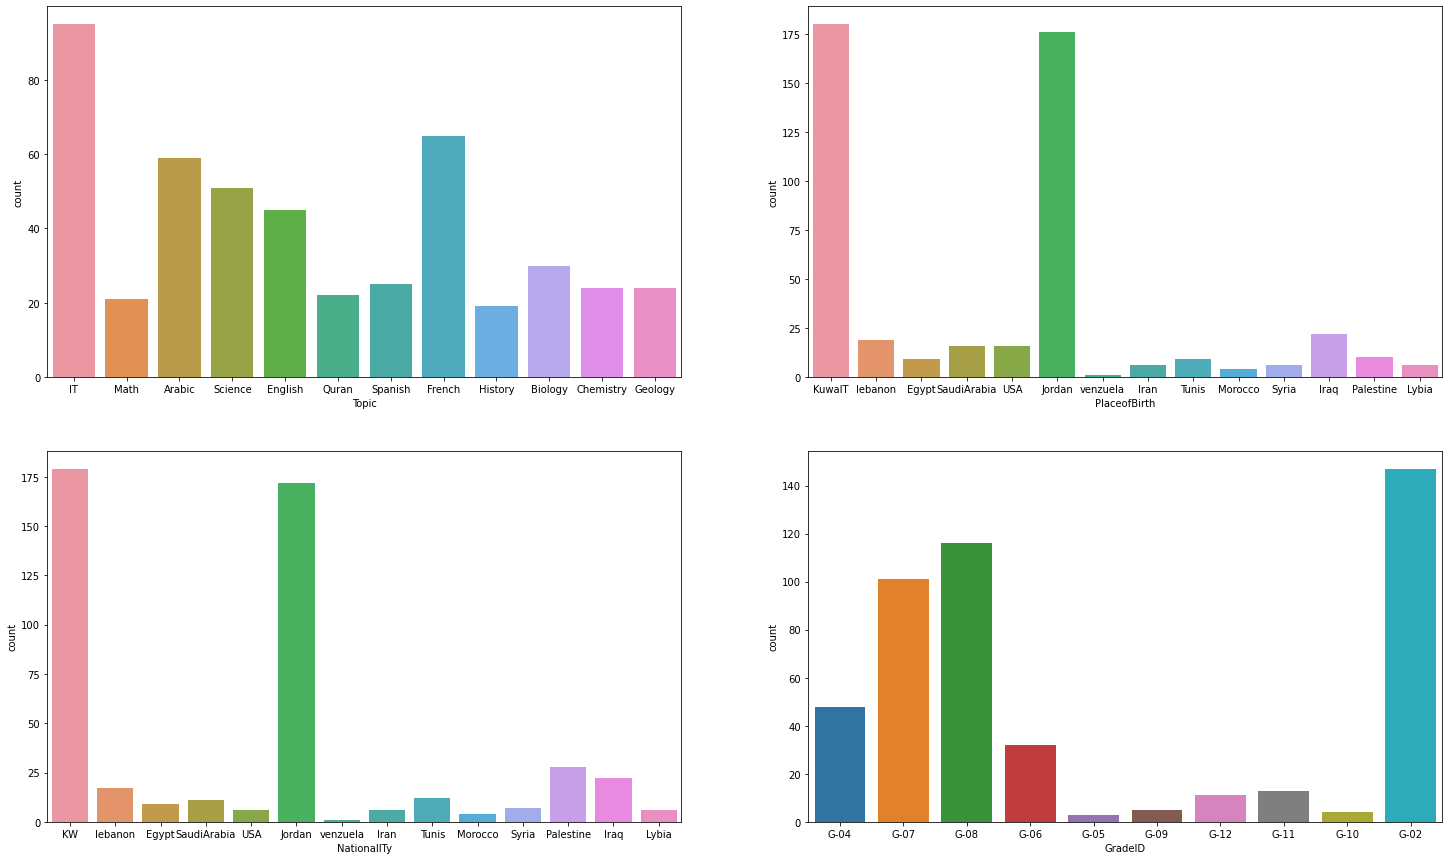

In [23]:
f , axes = plt.subplots(2,2,figsize=(25,15))
sns.countplot(x='Topic',data=data,ax=axes[0,0])
sns.countplot(x='PlaceofBirth',data=data,ax=axes[0,1])
sns.countplot(x='NationalITy',data=data,ax=axes[1,0])
sns.countplot(x='GradeID',data=data,ax=axes[1,1])

* From the above plot IT topic is prefered by students
* Majority of students are born in KuwaIT and Jordan


## Q2.

<AxesSubplot:xlabel='Topic', ylabel='count'>

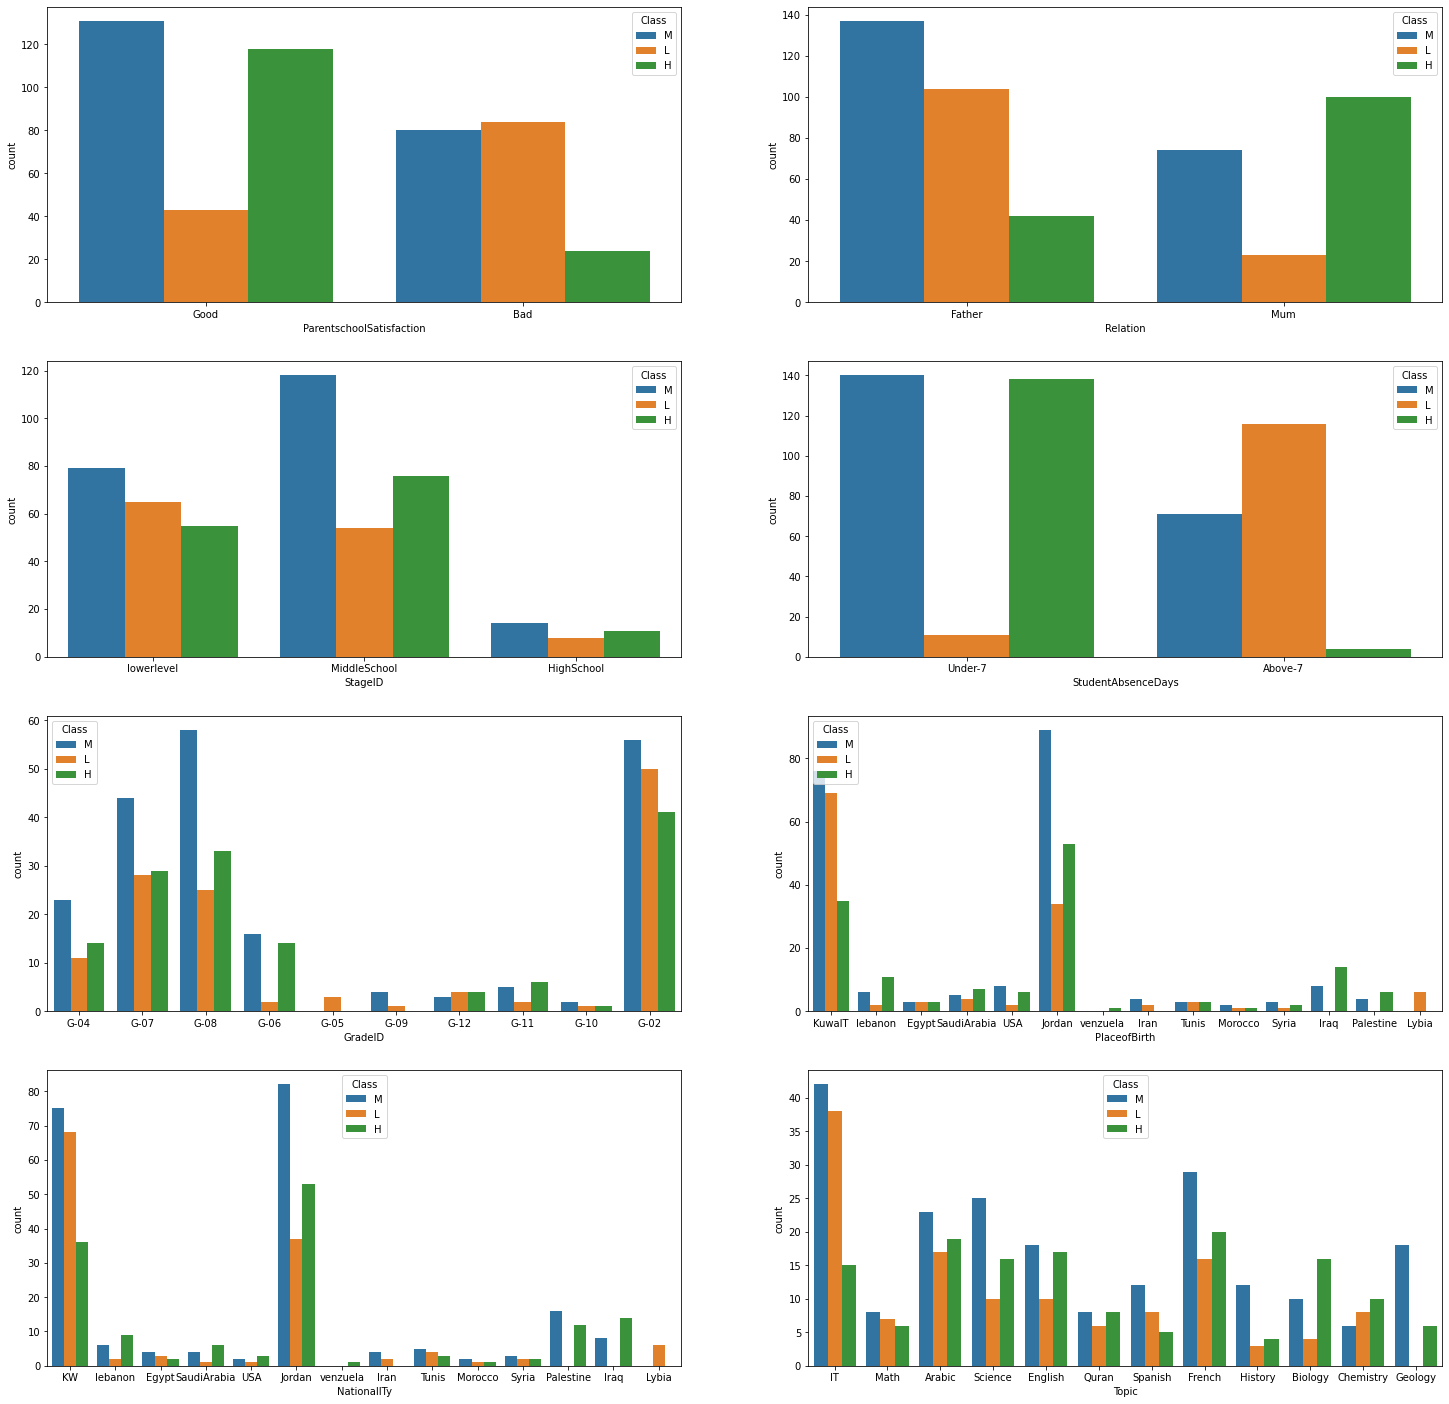

In [24]:
f , axes = plt.subplots(4,2,figsize=(25,25))

sns.countplot(x='ParentschoolSatisfaction',hue='Class',data=data,ax=axes[0,0])
sns.countplot(x='Relation',hue='Class',data=data,ax=axes[0,1])
sns.countplot(x='StageID',hue='Class',data=data,ax=axes[1,0])
sns.countplot(x='StudentAbsenceDays',hue='Class',data=data,ax=axes[1,1])
sns.countplot(x='GradeID',hue='Class',data=data,ax=axes[2,0])
sns.countplot(x='PlaceofBirth',hue='Class',data=data,ax=axes[2,1])
sns.countplot(x='NationalITy',hue='Class',data=data,ax=axes[3,0])
sns.countplot(x='Topic',hue='Class',data=data,ax=axes[3,1])

## Q3.

<AxesSubplot:xlabel='Class', ylabel='Discussion'>

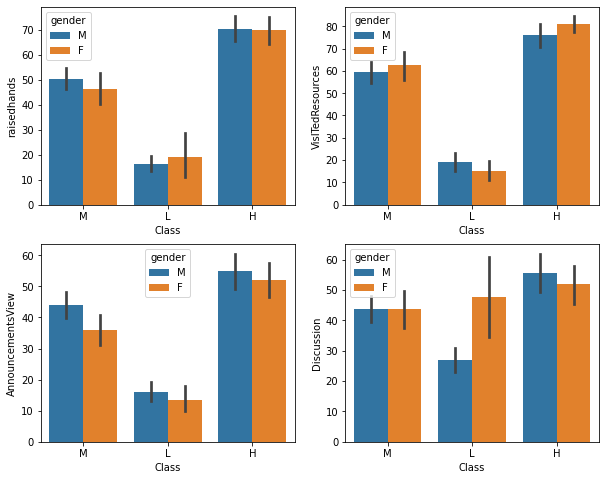

In [25]:
f ,axes =plt.subplots(2,2,figsize=(10,8))

sns.barplot(x='Class',y='raisedhands',hue='gender',data=data,ax=axes[0,0])
sns.barplot(x='Class',y='VisITedResources',hue='gender',data=data,ax=axes[0,1])
sns.barplot(x='Class',y='AnnouncementsView',hue='gender',data=data,ax=axes[1,0])
sns.barplot(x='Class',y='Discussion',hue='gender',data=data,ax=axes[1,1])

## Q4.

* There are higher number of boys as compared to girls
* Highschool  has the least number of students
* Section A has the highest number of students
* It is obsersved that boys have the highest interaction and discussions as compared to girls
* Highschool and medium school stage has the highest interaction and discussions as compared to lowerscool
* There are highest number of students having their nationality and place of bairth as either Kuwait or Jordan
* There are maximum no. of students from GradeID - G02
* The maximum responses given by parents regarding the school is good 
* Majority of the parents who submited the responses are fathers

## Q5.

## Odds ratio

In [26]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 1:

### Breaking data into 2 parts

* Qualitative variable
* Quantitative varable

In [27]:
Qualitative_variable = data[data.select_dtypes(include=['object']).columns.tolist()]
Qualitative_variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,No,Bad,Above-7,M


#### Converting qualitative variable to quantitative varaible for further analysis

In [28]:
from sklearn.preprocessing import LabelEncoder
Qualitative_variable = Qualitative_variable.apply(LabelEncoder().fit_transform)
Qualitative_variable.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,1,1,1,2
1,1,4,4,2,1,0,7,0,0,1,1,1,2
2,1,4,4,2,1,0,7,0,0,0,0,0,1
3,1,4,4,2,1,0,7,0,0,0,0,0,1
4,1,4,4,2,1,0,7,0,0,0,0,0,2


In [29]:
Quantitative_variable = data[data.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_variable.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


### Combining the data set 

In [30]:
final_combined = pd.concat([Quantitative_variable,Qualitative_variable],axis=1)
final_combined.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,15,16,2,20,1,4,4,2,1,0,7,0,0,1,1,1,2
1,20,20,3,25,1,4,4,2,1,0,7,0,0,1,1,1,2
2,10,7,0,30,1,4,4,2,1,0,7,0,0,0,0,0,1
3,30,25,5,35,1,4,4,2,1,0,7,0,0,0,0,0,1
4,40,50,12,50,1,4,4,2,1,0,7,0,0,0,0,0,2


## Step 2:

### Data partition

* Splitting dataset into train and test 
* Train would contain 70% and test would contain 30% of the dataset

In [31]:
from sklearn.model_selection import train_test_split

x = final_combined.drop('Class',axis=1)
y = final_combined[['Class']]

x_train , x_test , y_train , y_test =train_test_split(x,y,train_size=0.7,random_state=67)

## Step 3:

### Model Building

#### H0: There is no log linear relationship between Class and all independent variable

#### vs

#### H1: There is log linear relationship between Class and all independent variable

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output =logreg.fit(x_train,y_train)

In [33]:
output.intercept_

array([-0.52025058,  0.45315233,  0.06709825])

In [34]:
output.coef_

array([[ 2.79443235e-02,  1.86873520e-02,  5.14968618e-03,
         1.02060689e-02, -7.50555181e-01, -1.38712602e-01,
         1.61125335e-01, -9.67573221e-01, -3.92297597e-01,
         7.44709133e-02, -1.09649149e-01, -2.50494518e-01,
         4.87626590e-01,  3.10347749e-01,  2.06590742e-01,
         7.15392481e-01],
       [-2.75613457e-02, -2.35278764e-02, -1.53211620e-02,
        -6.88148792e-03,  6.40677875e-01, -1.90041293e-02,
         2.35163974e-02,  9.14469813e-01,  3.47557143e-01,
        -4.05327735e-02,  2.44489671e-02,  2.89415570e-01,
         9.66157221e-02, -4.94097606e-01, -2.34854444e-01,
        -8.98252572e-01],
       [-3.82977782e-04,  4.84052446e-03,  1.01714758e-02,
        -3.32458101e-03,  1.09877306e-01,  1.57716731e-01,
        -1.84641732e-01,  5.31034078e-02,  4.47404542e-02,
        -3.39381398e-02,  8.52001821e-02, -3.89210516e-02,
        -5.84242312e-01,  1.83749856e-01,  2.82637025e-02,
         1.82860091e-01]])

In [35]:
output.n_features_in_

16

#### We reject H0,hence there is log linear relationship between Class and all independent variable

## Step 4:

### Prediction on train data set

In [36]:
train = pd.concat([x_train,y_train],axis=1)
train.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
36,8,6,4,22,1,4,4,1,4,1,10,0,1,1,1,0,1
288,71,70,65,69,1,7,3,1,3,0,3,0,1,1,1,1,2
63,17,13,16,12,1,4,4,0,7,0,7,0,0,1,0,1,2
78,13,3,11,9,1,4,4,0,8,0,9,0,0,0,0,0,1
128,12,10,20,16,1,4,4,2,0,2,7,0,0,0,0,1,1


In [37]:
train['Predicted'] =output.predict(x_train)
train.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Predicted
36,8,6,4,22,1,4,4,1,4,1,10,0,1,1,1,0,1,1
288,71,70,65,69,1,7,3,1,3,0,3,0,1,1,1,1,2,0
63,17,13,16,12,1,4,4,0,7,0,7,0,0,1,0,1,2,2
78,13,3,11,9,1,4,4,0,8,0,9,0,0,0,0,0,1,1
128,12,10,20,16,1,4,4,2,0,2,7,0,0,0,0,1,1,1


## Step 5:

### Model performance metrics ( train )

In [38]:
train.shape

(336, 18)

In [39]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['Class'])
matrix

array([[ 71,   0,  30],
       [  0,  75,  15],
       [ 31,  13, 101]], dtype=int64)

## Step 6:

### Classification_report ( train )

In [40]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       102
           1       0.83      0.85      0.84        88
           2       0.70      0.69      0.69       146

    accuracy                           0.74       336
   macro avg       0.74      0.75      0.75       336
weighted avg       0.73      0.74      0.73       336



#### Accuracy of model is 74%,hence the model is good fit


## Step 7:

### Prediction on Test data 

In [41]:
test =pd.concat([x_test,y_test],axis=1)
test.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
20,60,60,33,90,0,4,4,1,4,0,7,0,0,0,0,0,2
224,87,81,22,70,1,4,4,1,5,1,11,1,1,1,0,1,0
72,11,2,2,8,1,4,4,1,4,0,8,0,0,0,0,1,1
426,80,80,62,11,1,3,3,1,5,0,2,0,1,1,1,0,2
37,45,54,26,90,0,0,0,1,4,0,7,0,0,1,1,1,2


In [42]:
test['Predicted']=output.predict(x_test)
test.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Predicted
20,60,60,33,90,0,4,4,1,4,0,7,0,0,0,0,0,2,2
224,87,81,22,70,1,4,4,1,5,1,11,1,1,1,0,1,0,2
72,11,2,2,8,1,4,4,1,4,0,8,0,0,0,0,1,1,1
426,80,80,62,11,1,3,3,1,5,0,2,0,1,1,1,0,2,2
37,45,54,26,90,0,0,0,1,4,0,7,0,0,1,1,1,2,2


## Step 8:

### Model Performance metrics ( test )

In [43]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test['Class'],test['Predicted'])
matrix

array([[29,  1, 10],
       [ 0, 32,  7],
       [18,  5, 42]], dtype=int64)

## Step 9:

### Classification_report ( test )

In [44]:
?classification_report

In [45]:
from sklearn.metrics import classification_report 
print(classification_report(test['Class'],test['Predicted']))

              precision    recall  f1-score   support

           0       0.62      0.72      0.67        40
           1       0.84      0.82      0.83        39
           2       0.71      0.65      0.68        65

    accuracy                           0.72       144
   macro avg       0.72      0.73      0.73       144
weighted avg       0.72      0.72      0.72       144



#### Accuracy of model is 72% ,hence model is good fit

## Step 10:

### Coefficient of log regression

In [46]:
output.intercept_,output.coef_

(array([-0.52025058,  0.45315233,  0.06709825]),
 array([[ 2.79443235e-02,  1.86873520e-02,  5.14968618e-03,
          1.02060689e-02, -7.50555181e-01, -1.38712602e-01,
          1.61125335e-01, -9.67573221e-01, -3.92297597e-01,
          7.44709133e-02, -1.09649149e-01, -2.50494518e-01,
          4.87626590e-01,  3.10347749e-01,  2.06590742e-01,
          7.15392481e-01],
        [-2.75613457e-02, -2.35278764e-02, -1.53211620e-02,
         -6.88148792e-03,  6.40677875e-01, -1.90041293e-02,
          2.35163974e-02,  9.14469813e-01,  3.47557143e-01,
         -4.05327735e-02,  2.44489671e-02,  2.89415570e-01,
          9.66157221e-02, -4.94097606e-01, -2.34854444e-01,
         -8.98252572e-01],
        [-3.82977782e-04,  4.84052446e-03,  1.01714758e-02,
         -3.32458101e-03,  1.09877306e-01,  1.57716731e-01,
         -1.84641732e-01,  5.31034078e-02,  4.47404542e-02,
         -3.39381398e-02,  8.52001821e-02, -3.89210516e-02,
         -5.84242312e-01,  1.83749856e-01,  2.82637025e-0